<div class="markdown-google-sans">

## **Can personality predict longitudinal study attrition? Evidence from a population-based sample of older adults**
</div>

This [study](https://www.sciencedirect.com/science/article/abs/pii/S0092656618303258?via%3Dihub) examined the phenomenon of Attrition Bias, which refers to the gradual withdrawal of participants from a research study over time. The research material from this study was made publicly available, allowing for an examination of the statistical methods employed.

Let's replicate their findings

<div class="markdown-google-sans">

## **Packages**
</div>

We import the needed packages with the following code

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="markdown-google-sans">

##**Data import**
</div>

We import the dataset through the URL. The research data is public. [LINK](https://data.mendeley.com/datasets/g3jx8zt2t9/1)

In [ ]:
df = pd.read_csv('https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/3ab47ddf-4b17-49de-9a1d-68126529ea74')

Lets have a first glance at the Dataset

In [ ]:
df.head()
#df.tail()

,Unnamed: 0,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,BMissing,CMissing,Attrition,Age,Gender,Education
0,1,2.75,4.00,1.75,3.00,2.00,0,1,0,60,1,0
1,2,3.25,3.50,3.00,3.25,2.75,0,0,0,64,1,1
2,3,3.50,2.75,4.00,4.25,1.75,0,1,0,60,0,0
3,4,4.00,4.00,4.00,3.75,1.50,0,1,0,60,1,0
4,5,2.50,3.00,1.75,4.25,2.00,0,1,0,60,0,1


<div class="markdown-google-sans">

##**Descriptive statistics**
</div>

Basic statistics are a fundamental component of any study and are used to analyze and interpret data. Some commonly used basic statistics include measures of central tendency, such as mean, median, and mode, which provide information about the typical or central value of a dataset. Variability measures, such as standard deviation and range, are also important for understanding how much the data varies.

In [ ]:
n_total = df["Age"].count()
n_no_attrution = df.groupby(['Attrition'])['Age'].count()[0]
n_attrution = df.groupby(['Attrition'])['Age'].count()[1]

age_min = df['Age'].min()
age_max = df['Age'].max()
range = age_max-age_min

age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode()
age_std = df['Age'].std()


print(f'Total Participants: {n_total}, Attrition Group {n_attrution}, No-Attrition Group: {n_no_attrution}')
print(f'The Age Range is {range} with a min: {age_min}, max: {age_max}')
print(f'Age Mean: {round(age_mean, 2)}, Median: {round(age_median, 2)}, Mode: {age_mode.values[0]}, Std: {round(age_std, 2)}')

Total Participants: 4807, Attrition Group 600, No Attrition Group: 4207
The Age Range is 6 with a min: 60, max: 66
Age Mean: 63.1, Median: 63.0, Mode: 66, Std: 2.0


Let's create a bar chart. We want to see if there could be a difference between the gender and the BIG-Five Scores. Of course even if we spot a difference we still have to test for significance. 

For this we calulate the means of each factor for each subgroup. We now have a *groupby* object which we can plot and have a first visual examination.

In [ ]:
df_gender = df.groupby(['Gender'])['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism'].mean()
df_gender.plot(kind='bar', title='Mean Big Five Scores by Gender', ylabel='Mean Scores',
         xlabel='Gender')

NameError: ignored

<div class="markdown-google-sans">

## **Task 1**

**Please create a bar chart which shows participant's Big Five scores grouped by education, instead of by gender.**
</div>
 

In [ ]:
#Input your code here

Spolier: Solution
<details>
  <summary>View Solution</summary>
    <code>
      df_education = df.groupby(['Education'])['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism'].mean() <br>
df_education.plot(kind='bar', title='Mean Big Five Scores by Gender', ylabel='Mean Scores',
         xlabel='Gender') <br>
    </code>
</details>

<div class="markdown-google-sans">

##**Means and Standard Deviations of the Big Five Personality Traits Stratified by Study Attrition**
</div>

Let's see if we get the the same results as the authors in the study. It's basically the same steps as above except that we group the sample by the attrition variable this time.

If we than compare the results with the table on the right we indeed managed to replicate their results.

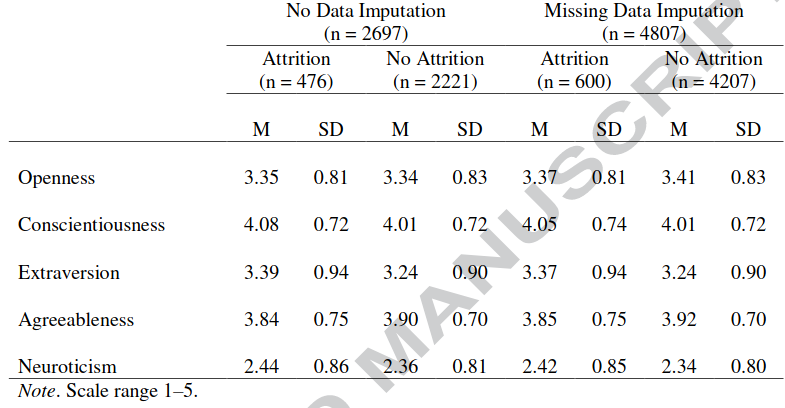


In [ ]:
df_attrition_mean = df.groupby(['Attrition'])['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism'].mean()
print(df_attrition_mean)

           Openness  Conscientiousness  Extraversion  Agreeableness  \
Attrition                                                             
0          3.411101           4.005586       3.23972       3.915379   
1          3.367083           4.052917       3.36750       3.850833   

           Neuroticism  
Attrition               
0             2.340504  
1             2.415833  
           Openness  Conscientiousness  Extraversion  Agreeableness  \
Attrition                                                             
0          0.825150           0.717453      0.901041       0.697693   
1          0.814069           0.736603      0.937724       0.745772   

           Neuroticism  
Attrition               
0             0.804817  
1             0.850586  


<div class="markdown-google-sans">

## **Task 2**

**Please replicate the results for Standard Deviation**
</div>
 

In [ ]:
#Input your code here

Spolier: Solution
<details>
  <summary>View Solution</summary>
    <code>
      df_attrition_std = df.groupby(['Attrition'])['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism'].std() <br>
print(df_attrition_std) <br>
    </code>
</details>